# ANOVA with Tukey HSD

Based on https://scipy.github.io/devdocs/reference/generated/scipy.stats.tukey_hsd.html

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import tukey_hsd

import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
executions = pd.read_excel("data/executions.xlsx")
executions

,train dataset,R_HV,R_AV,R_W,concept drift dataset,R_HV.1,R_AV.1,R_W.1,algorithm
0,"waymo, astazero, stern2v, bjtu",97.125257,97.759522,0.974424,zalazone,77.640017,94.910724,0.862754,biLSTM
1,"waymo, astazero, stern2v, bjtu",97.296372,97.684839,0.974906,zalazone,75.844378,92.922057,0.843832,biLSTM
2,"waymo, astazero, stern2v, bjtu",97.262149,98.767737,0.980149,zalazone,83.924754,92.152251,0.880385,biLSTM
3,"waymo, astazero, stern2v, bjtu",96.954141,98.319642,0.976369,zalazone,82.770415,93.691864,0.882311,biLSTM
4,"waymo, astazero, stern2v, bjtu",97.227926,97.946229,0.975871,zalazone,78.024797,95.413236,0.867190,biLSTM
5,"waymo, astazero, stern2v, bjtu",96.372348,98.543689,0.974580,zalazone,81.402309,91.168609,0.862855,biLSTM
6,"waymo, astazero, stern2v, bjtu",97.159480,98.244959,0.977022,zalazone,75.459598,94.964183,0.852119,biLSTM
7,"waymo, astazero, stern2v, bjtu",97.296372,97.572816,0.974346,zalazone,83.967507,94.354752,0.891611,biLSTM
8,"waymo, astazero, stern2v, bjtu",97.159480,97.535474,0.973475,zalazone,77.084224,95.744681,0.864145,biLSTM
9,"waymo, astazero, stern2v, bjtu",98.214876,98.400711,0.983078,zalazone,81.915348,91.168609,0.865420,biLSTM


In [3]:
test_data = executions.groupby("algorithm")

In [4]:
R_HV = {}
R_AV = {}
R_W = {}
for alg in executions["algorithm"].unique():
    R_HV[alg] = test_data.get_group(alg)["R_HV"].values
    R_AV[alg] = test_data.get_group(alg)["R_AV"].values
    R_W[alg] = test_data.get_group(alg)["R_W"].values

R_HV

{'biLSTM': array([97.12525667, 97.29637235, 97.26214921, 96.954141  , 97.22792608,
        96.37234771, 97.15947981, 97.29637235, 97.15947981, 98.21487603,
        97.91735537, 97.55371901, 97.55371901, 98.01652893, 98.14876033,
        98.14876033, 98.01652893, 97.88429752, 98.11570248, 97.4214876 ]),
 'Li_et_al + our features': array([96.88569473, 96.40657084, 96.44079398, 97.02258727, 97.26214921,
        97.36481862, 96.81724846, 96.98836413, 97.22792608, 96.37234771,
        96.39669421, 96.85950413, 95.63636364, 95.66942149, 97.58677686,
        96.76033058, 96.92561983, 97.12396694, 97.05785124, 96.        ]),
 'Li_et_al': array([86.17117117, 87.83783784, 86.77927928, 86.3963964 , 87.04954955,
        87.59009009, 86.8018018 , 87.68018018, 86.41891892, 86.89189189,
        96.92451072, 96.90121156, 97.22739981, 96.73811743, 96.94780988,
        97.36719478, 97.34389562, 97.08760485, 97.62348555, 97.18080149])}

## Tukey HSD / Kruskal test

### Test executions

#### HV Analysis and plot

In [5]:
res_HV = tukey_hsd(R_HV["biLSTM"], R_HV["Li_et_al + our features"], R_HV["Li_et_al"])
res_AV = tukey_hsd(R_AV["biLSTM"], R_AV["Li_et_al + our features"], R_AV["Li_et_al"])
res_W = tukey_hsd(R_W["biLSTM"], R_W["Li_et_al + our features"], R_W["Li_et_al"])

In [6]:
res_HV.pvalue

array([[1.00000000e+00, 6.85600802e-01, 1.36166727e-06],
       [6.85600802e-01, 1.00000000e+00, 2.81868183e-05],
       [1.36166727e-06, 2.81868183e-05, 1.00000000e+00]])

In [7]:
import itertools
from scipy import stats

kruskal_results = pd.DataFrame(columns=['algorithm1', 'algorithm2', 'pvalue'])

stuff = ["biLSTM", "Li_et_al + our features", "Li_et_al"]

for num, subset in enumerate(itertools.combinations(stuff, 2)):
    kruskal_results.loc[num] = [subset[0], subset[1], stats.kruskal(R_HV[subset[0]], R_HV[subset[1]]).pvalue]
    
kruskal_results

,algorithm1,algorithm2,pvalue
0,biLSTM,Li_et_al + our features,0.000046
1,biLSTM,Li_et_al,0.000031
2,Li_et_al + our features,Li_et_al,0.136816


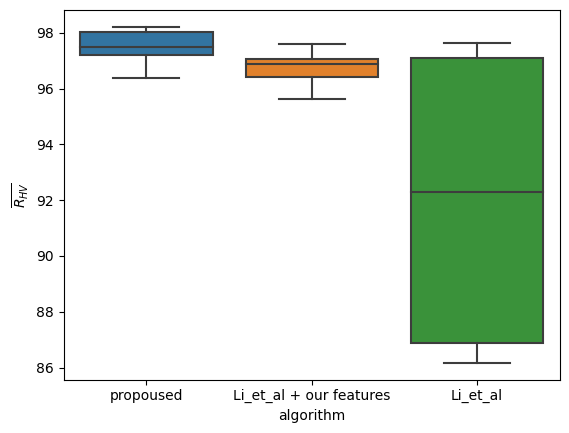

In [8]:
import seaborn as sns
from statannotations.Annotator import Annotator

algorithms = np.unique(executions["algorithm"])

ax = sns.boxplot(data=executions, x="algorithm", y="R_HV")

pairs = [(i[1]["algorithm1"], i[1]["algorithm2"]) for i in kruskal_results.iterrows()]

p_values = [i[1]["pvalue"] for i in kruskal_results.iterrows()]

ax.set_xticklabels(["propoused", "Li_et_al + our features", "Li_et_al"])

ax.set_ylabel("$\overline{R_{HV}}$")

# annotator = Annotator(ax, pairs, data=executions, x="algorithm", y="R_HV")

# annotator.configure(text_format="simple", loc="inside")

# annotator.set_pvalues_and_annotate(p_values)

plt.show()

#### AV Analysis and plot

In [9]:
import itertools

kruskal_results = pd.DataFrame(columns=['algorithm1', 'algorithm2', 'pvalue'])

stuff = ["biLSTM", "Li_et_al + our features", "Li_et_al"]

for num, subset in enumerate(itertools.combinations(stuff, 2)):
    kruskal_results.loc[num] = [subset[0], subset[1], stats.kruskal(R_AV[subset[0]], R_AV[subset[1]]).pvalue]
    
kruskal_results

,algorithm1,algorithm2,pvalue
0,biLSTM,Li_et_al + our features,0.000507
1,biLSTM,Li_et_al,0.058255
2,Li_et_al + our features,Li_et_al,0.498840


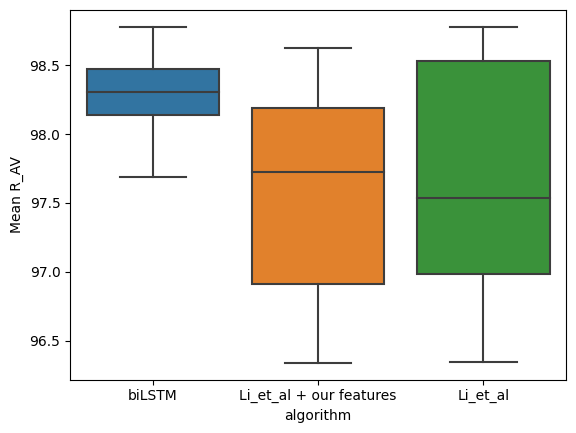

In [10]:
import seaborn as sns
from statannotations.Annotator import Annotator

algorithms = np.unique(executions["algorithm"])

ax = sns.boxplot(data=executions, x="algorithm", y="R_AV", showfliers = False)

pairs = [(i[1]["algorithm1"], i[1]["algorithm2"]) for i in kruskal_results.iterrows()]

p_values = [i[1]["pvalue"] for i in kruskal_results.iterrows()]

ax.set_xticklabels(["biLSTM", "Li_et_al + our features", "Li_et_al"])

ax.set_ylabel("Mean R_AV")

# annotator = Annotator(ax, pairs, data=executions, x="algorithm", y="R_AV")

# annotator.configure(text_format="simple", loc="inside")

# annotator.set_pvalues_and_annotate(p_values)

plt.show()

#### W Analysis and plot

In [11]:
import itertools

kruskal_results = pd.DataFrame(columns=['algorithm1', 'algorithm2', 'pvalue'])

stuff = ["biLSTM", "Li_et_al + our features", "Li_et_al"]

for num, subset in enumerate(itertools.combinations(stuff, 2)):
    kruskal_results.loc[num] = [subset[0], subset[1], stats.kruskal(R_W[subset[0]], R_W[subset[1]]).pvalue]
    
kruskal_results

,algorithm1,algorithm2,pvalue
0,biLSTM,Li_et_al + our features,0.000003
1,biLSTM,Li_et_al,0.000592
2,Li_et_al + our features,Li_et_al,0.849818


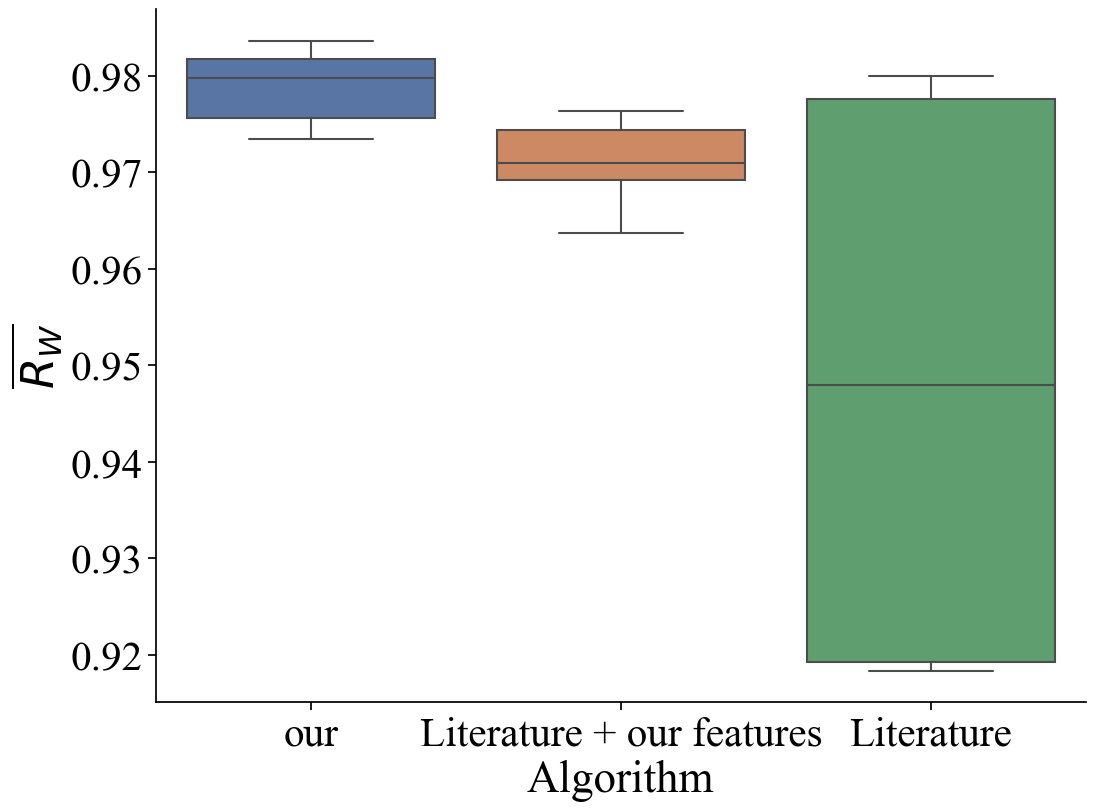

In [24]:
import seaborn as sns
from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.figsize":(12, 9), 'text.color': 'black', 'xtick.color': 'black', 'ytick.color': 'black', 'axes.facecolor':'white', 'axes.edgecolor':'black', 'axes.labelcolor':'black'}


algorithms = np.unique(executions["algorithm"])

sns.set_theme(style="ticks", rc=custom_params, font="Times New Roman", font_scale=2.7)

ax = sns.boxplot(data=executions, x="algorithm", y="R_W")

pairs = [(i[1]["algorithm1"], i[1]["algorithm2"]) for i in kruskal_results.iterrows()]

p_values = [i[1]["pvalue"] for i in kruskal_results.iterrows()]

ax.set_xticklabels(["our", "Literature + our features", "Literature"])

ax.set_ylabel("$\overline{R_{W}}$")
ax.set_xlabel("Algorithm")

fig = ax.get_figure()
    
fig.savefig(f"Rw_test.png", transparent=True)

plt.show()

### Concept drift executions

#### HV Analysis and plot

In [13]:
R_HV = {}
R_AV = {}
R_W = {}
for alg in executions["algorithm"].unique():
    R_HV[alg] = test_data.get_group(alg)["R_HV.1"].values
    R_AV[alg] = test_data.get_group(alg)["R_AV.1"].values
    R_W[alg] = test_data.get_group(alg)["R_W.1"].values

R_HV

{'biLSTM': array([77.6400171 , 75.84437794, 83.92475417, 82.77041471, 78.02479692,
        81.40230868, 75.45959812, 83.96750748, 77.08422403, 81.91534844,
        98.12258421, 97.95692987, 98.28823854, 98.39867477, 98.34345665,
        99.0612921 , 97.90171176, 97.90171176, 98.01214798, 97.6256212 ]),
 'Li_et_al + our features': array([79.09362976, 81.48781531, 73.87772552, 78.53783668, 77.68277041,
        73.70671227, 75.58785806, 76.95596409, 73.23642582, 69.30312099,
        97.07344009, 96.96300387, 97.18387631, 98.01214798, 96.07951408,
        97.23909442, 97.90171176, 98.01214798, 93.26339039, 96.57647708]),
 'Li_et_al': array([99.0469931 , 98.91554387, 98.52119619, 99.17844233, 98.71837003,
        99.07985541, 98.06112389, 98.75123234, 98.81695695, 97.33815314,
        89.02564103, 85.51282051, 86.58974359, 89.05128205, 89.02564103,
        89.48717949, 86.02564103, 88.69230769, 89.28205128, 87.87179487])}

In [14]:
import itertools
from scipy import stats

kruskal_results = pd.DataFrame(columns=['algorithm1', 'algorithm2', 'pvalue'])

stuff = ["biLSTM", "Li_et_al + our features", "Li_et_al"]

for num, subset in enumerate(itertools.combinations(stuff, 2)):
    kruskal_results.loc[num] = [subset[0], subset[1], stats.kruskal(R_HV[subset[0]], R_HV[subset[1]]).pvalue]
    
kruskal_results

,algorithm1,algorithm2,pvalue
0,biLSTM,Li_et_al + our features,0.074103
1,biLSTM,Li_et_al,0.032585
2,Li_et_al + our features,Li_et_al,0.008688


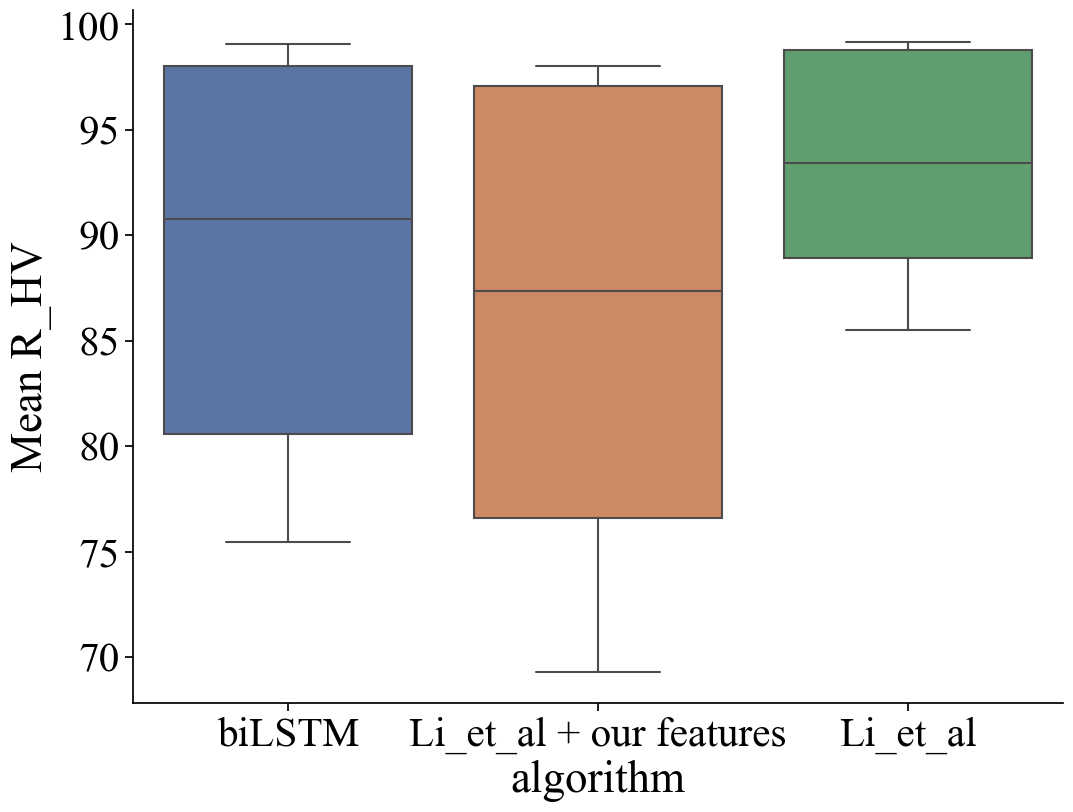

In [15]:
import seaborn as sns
from statannotations.Annotator import Annotator

algorithms = np.unique(executions["algorithm"])

ax = sns.boxplot(data=executions, x="algorithm", y="R_HV.1")

pairs = [(i[1]["algorithm1"], i[1]["algorithm2"]) for i in kruskal_results.iterrows()]

p_values = [i[1]["pvalue"] for i in kruskal_results.iterrows()]

ax.set_xticklabels(["biLSTM", "Li_et_al + our features", "Li_et_al"])

ax.set_ylabel("Mean R_HV")

# annotator = Annotator(ax, pairs, data=executions, x="algorithm", y="R_HV.1")

# annotator.configure(text_format="simple", loc="inside")

# annotator.set_pvalues_and_annotate(p_values)

plt.show()

#### AV Analysis and plot

In [16]:
import itertools
from scipy import stats

kruskal_results = pd.DataFrame(columns=['algorithm1', 'algorithm2', 'pvalue'])

stuff = ["biLSTM", "Li_et_al + our features", "Li_et_al"]

for num, subset in enumerate(itertools.combinations(stuff, 2)):
    kruskal_results.loc[num] = [subset[0], subset[1], stats.kruskal(R_AV[subset[0]], R_AV[subset[1]]).pvalue]
    
kruskal_results

,algorithm1,algorithm2,pvalue
0,biLSTM,Li_et_al + our features,4.902732e-01
1,biLSTM,Li_et_al,6.284011e-08
2,Li_et_al + our features,Li_et_al,6.301848e-08


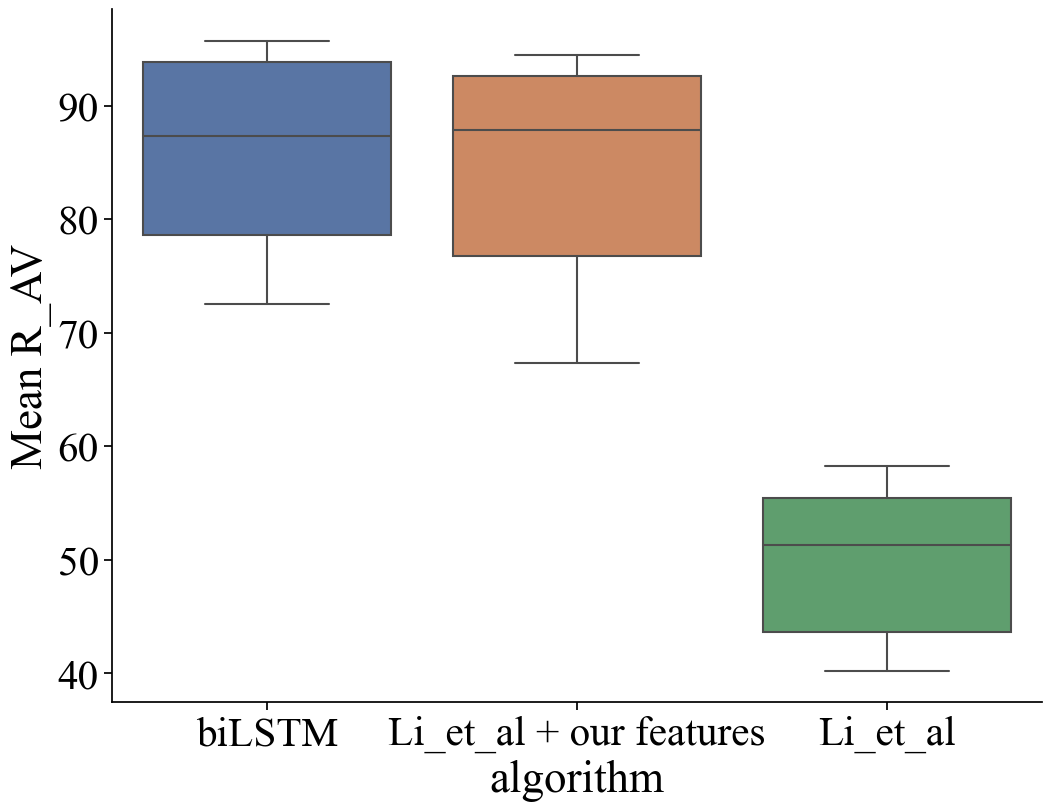

In [17]:
import seaborn as sns
from statannotations.Annotator import Annotator

algorithms = np.unique(executions["algorithm"])

ax = sns.boxplot(data=executions, x="algorithm", y="R_AV.1")

pairs = [(i[1]["algorithm1"], i[1]["algorithm2"]) for i in kruskal_results.iterrows()]

p_values = [i[1]["pvalue"] for i in kruskal_results.iterrows()]

ax.set_xticklabels(["biLSTM", "Li_et_al + our features", "Li_et_al"])

ax.set_ylabel("Mean R_AV")

# annotator = Annotator(ax, pairs, data=executions, x="algorithm", y="R_AV.1")

# annotator.configure(text_format="simple", loc="inside")

# annotator.set_pvalues_and_annotate(p_values)

plt.show()

#### W Analysis and plot

In [18]:
import itertools
from scipy import stats

kruskal_results = pd.DataFrame(columns=['algorithm1', 'algorithm2', 'pvalue'])

stuff = ["biLSTM", "Li_et_al + our features", "Li_et_al"]

for num, subset in enumerate(itertools.combinations(stuff, 2)):
    kruskal_results.loc[num] = [subset[0], subset[1], stats.kruskal(R_W[subset[0]], R_W[subset[1]]).pvalue]
    
kruskal_results

,algorithm1,algorithm2,pvalue
0,biLSTM,Li_et_al + our features,5.795918e-03
1,biLSTM,Li_et_al,6.301848e-08
2,Li_et_al + our features,Li_et_al,6.301848e-08


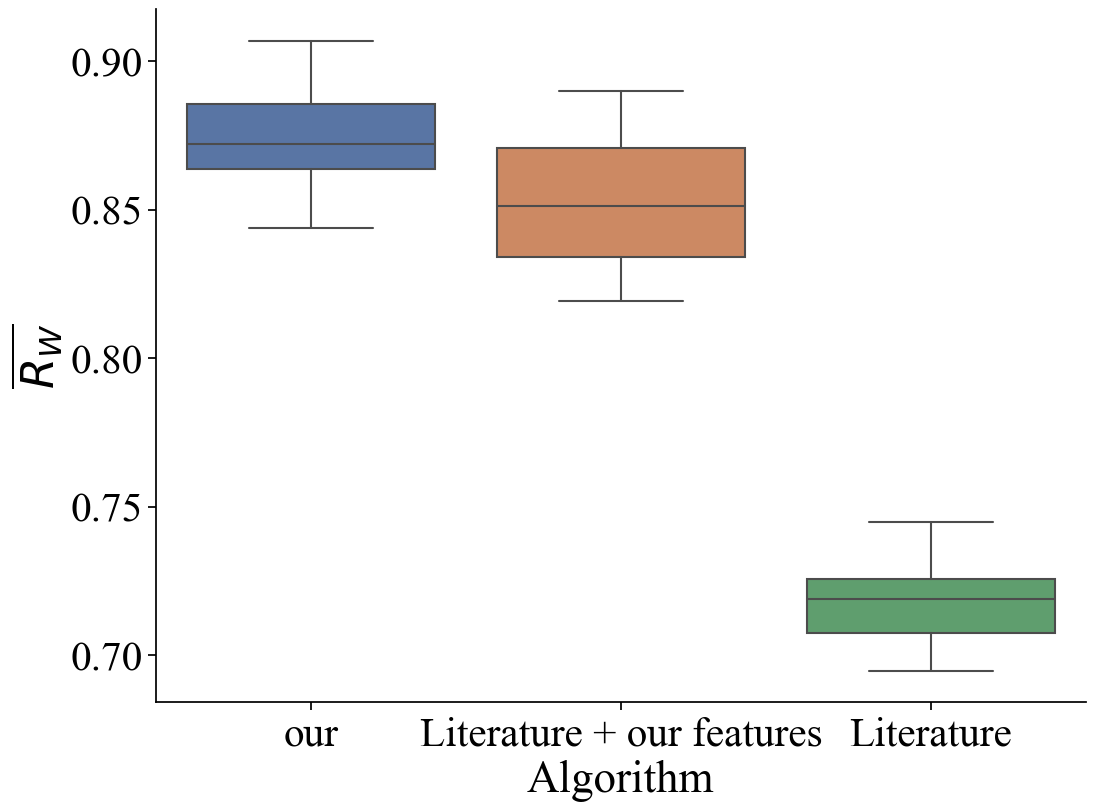

In [23]:
import seaborn as sns
from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.figsize":(12, 9), 'text.color': 'black', 'xtick.color': 'black', 'ytick.color': 'black', 'axes.facecolor':'white', 'axes.edgecolor':'black', 'axes.labelcolor':'black'}


algorithms = np.unique(executions["algorithm"])

sns.set_theme(style="ticks", rc=custom_params, font="Times New Roman", font_scale=2.7)

ax = sns.boxplot(data=executions, x="algorithm", y="R_W.1", showfliers = False)

pairs = [(i[1]["algorithm1"], i[1]["algorithm2"]) for i in kruskal_results.iterrows()]

p_values = [i[1]["pvalue"] for i in kruskal_results.iterrows()]

ax.set_xticklabels(["our", "Literature + our features", "Literature"])

ax.set_ylabel("$\overline{R_{W}}$")
ax.set_xlabel("Algorithm")

fig = ax.get_figure()
    
fig.savefig(f"Rw_cd.png", transparent=True)

plt.show()